<a href="https://colab.research.google.com/github/student64-ahmadi/Impulsive-Hamiltonian-Dynamics/blob/main/Article_physique_quant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 51.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


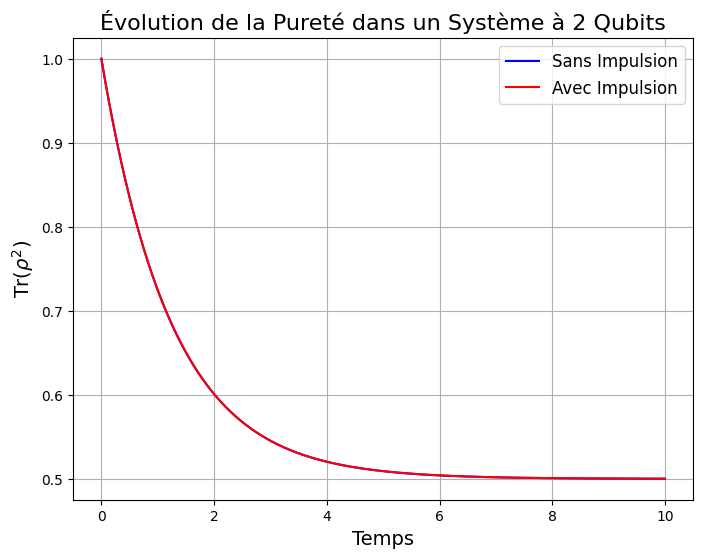

Simulation terminée. La figure est sauvegardée sous 'purity_evolution.pdf'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Importation des bibliothèques nécessaires
from qutip import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import datetime

# Paramètres du système
N = 2  # Nombre de qubits
gamma = 0.1  # Taux de dissipation
mu = 1.0  # Force de l'impulsion
t_event = 5.0  # Temps de l'impulsion
pulse_width = 0.01  # Largeur de l'impulsion Gaussienne (approximation de delta)

# Paramètres temporels
tlist = np.linspace(0, 10, 1000)  # Tableau de temps pour la simulation

# Définition des opérateurs
sigma_x = [sigmax(), sigmax()]  # Opérateurs sigma_x pour chaque qubit
sigma_z = [sigmaz(), sigmaz()]  # Opérateurs sigma_z pour chaque qubit

# Hamiltonien de base H0: - sigma1_x * sigma2_x
H0 = -tensor(sigma_x[0], sigma_x[1])

# Opérateurs de Lindblad pour la dissipation
L1 = tensor(sigmaz(), qeye(2))  # Dissipation sur le qubit 1
L2 = tensor(qeye(2), sigmaz())  # Dissipation sur le qubit 2
c_ops = [np.sqrt(gamma) * L1, np.sqrt(gamma) * L2]

# État initial : état maximalement intriqué
psi0 = (tensor(basis(2, 0), basis(2, 0)) + tensor(basis(2, 1), basis(2, 1))).unit()
rho0 = ket2dm(psi0)

# Fonction pour approximer la fonction delta par une impulsion Gaussienne
def gaussian_pulse(t, t_event, pulse_width):
    return (1.0 / (pulse_width * np.sqrt(2 * np.pi))) * np.exp(- (t - t_event)**2 / (2 * pulse_width**2))

# Coefficient dépendant du temps pour le terme impulsionnel
def impulse_coeff(t, args):
    return mu * gaussian_pulse(t, t_event, pulse_width)

# Hamiltonien complet avec impulsion : H(t) = H0 + mu * delta(t - t_event) * sigma1_z
H_t = [H0, [tensor(sigma_z[0], qeye(2)), impulse_coeff]]

# Simulation sans impulsion (équation de Lindblad standard)
result_no_impulse = mesolve(H0, rho0, tlist, c_ops, [])

# Simulation avec impulsion
result_with_impulse = mesolve(H_t, rho0, tlist, c_ops, [])

# Calcul de la pureté Tr(rho^2) pour les deux cas
purity_no_impulse = [np.trace(np.dot(rho.full(), rho.full())) for rho in result_no_impulse.states]
purity_with_impulse = [np.trace(np.dot(rho.full(), rho.full())) for rho in result_with_impulse.states]

# Création et sauvegarde de la figure
plt.figure(figsize=(8, 6))
plt.plot(tlist, purity_no_impulse, label="Sans Impulsion", color="blue")
plt.plot(tlist, purity_with_impulse, label="Avec Impulsion", color="red")
plt.xlabel("Temps", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$", fontsize=14)
plt.title("Évolution de la Pureté dans un Système à 2 Qubits", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Sauvegarde de la figure au format PDF haute résolution
plt.savefig("purity_evolution.pdf", format="pdf", dpi=300)
plt.show()

# Messages de sortie
print("Simulation terminée. La figure est sauvegardée sous 'purity_evolution.pdf'.")
from google.colab import files
files.download("purity_evolution.pdf")

/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


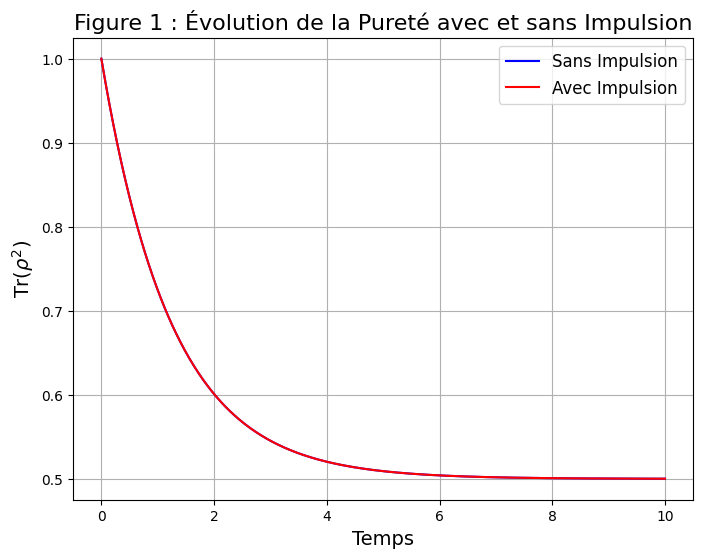

/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


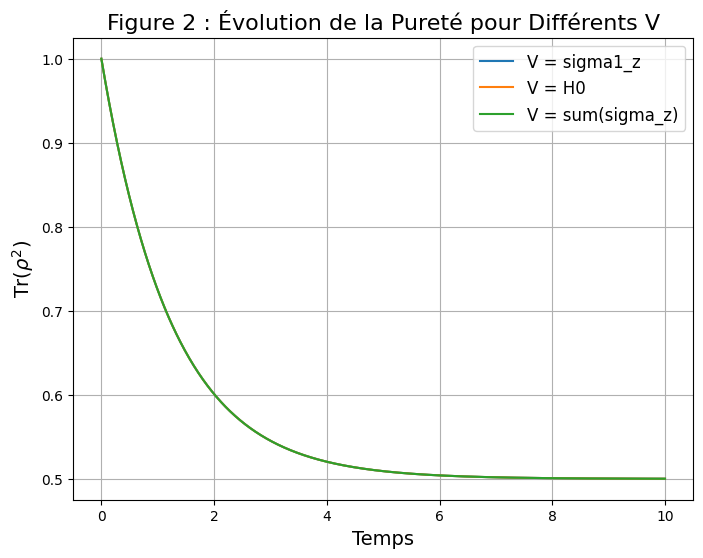

/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


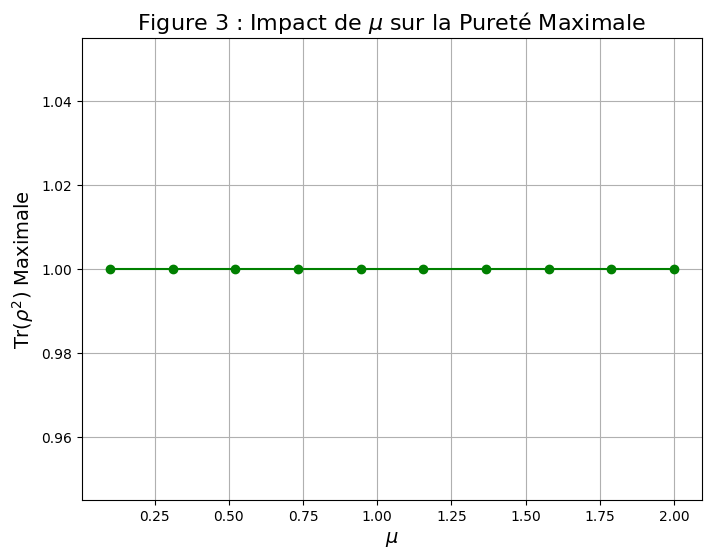

/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


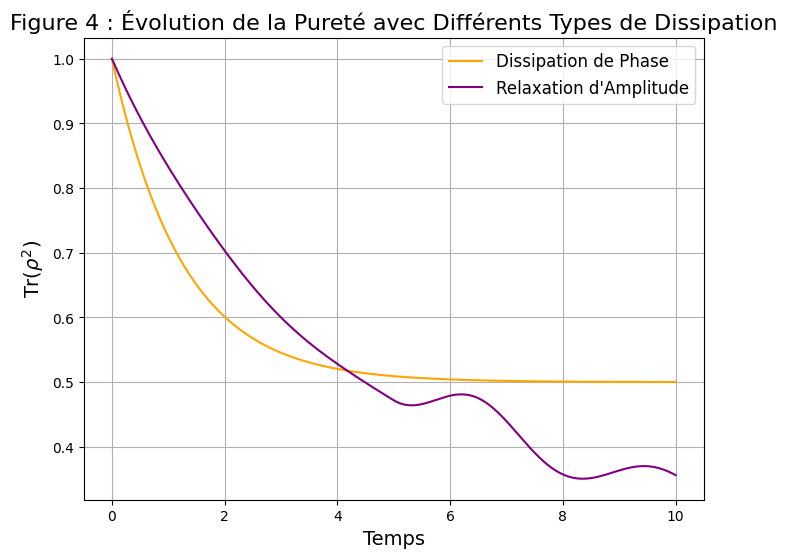

/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


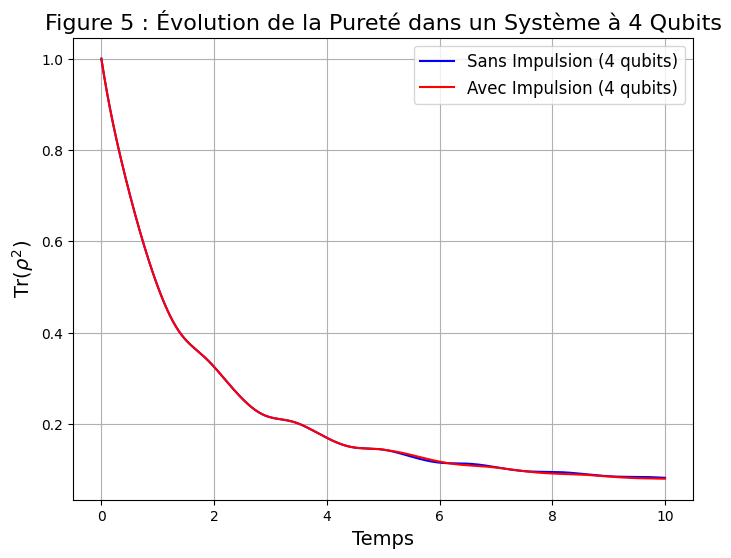

/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


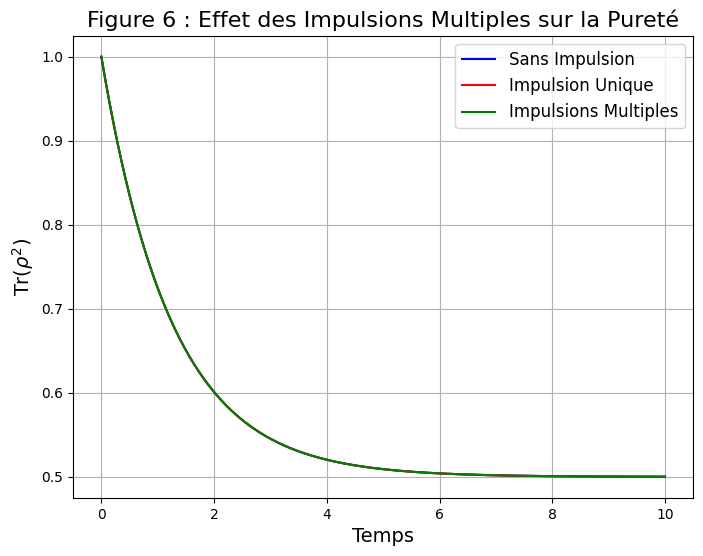

In [7]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Fonction pour approximer une impulsion delta par une Gaussienne
def gaussian_pulse(t, t_event, pulse_width):
    return (1.0 / (pulse_width * np.sqrt(2 * np.pi))) * np.exp(- (t - t_event)**2 / (2 * pulse_width**2))

# Fonction pour simuler l'évolution de la pureté
def simulate_purity(N, H0, c_ops, rho0, tlist, V=None, mu=1.0, t_event=5.0, pulse_width=0.01):
    if V is None:
        # Sans impulsion
        result = mesolve(H0, rho0, tlist, c_ops, [])
    else:
        # Avec impulsion
        def impulse_coeff(t, args):
            return mu * gaussian_pulse(t, t_event, pulse_width)
        H_t = [H0, [V, impulse_coeff]]
        result = mesolve(H_t, rho0, tlist, c_ops, [])
    purity = [np.trace(np.dot(rho.full(), rho.full())) for rho in result.states]
    return purity

# Paramètres généraux
N = 2  # Nombre de qubits initial
gamma = 0.1  # Taux de dissipation
t_event = 5.0  # Temps de l'impulsion
pulse_width = 0.01  # Largeur de l'impulsion
tlist = np.linspace(0, 10, 1000)  # Tableau de temps

# Définition des opérateurs pour 2 qubits
sigma_x = [sigmax(), sigmax()]
sigma_z = [sigmaz(), sigmaz()]
H0 = -tensor(sigma_x[0], sigma_x[1])  # Hamiltonien de base
L1 = tensor(sigmaz(), qeye(2))
L2 = tensor(qeye(2), sigmaz())
c_ops = [np.sqrt(gamma) * L1, np.sqrt(gamma) * L2]

# État initial : état maximalement intriqué
psi0 = (tensor(basis(2, 0), basis(2, 0)) + tensor(basis(2, 1), basis(2, 1))).unit()
rho0 = ket2dm(psi0)

# --- Figure 1 : Évolution de la Pureté avec et sans impulsion ---
purity_no_impulse = simulate_purity(N, H0, c_ops, rho0, tlist)
purity_with_impulse = simulate_purity(N, H0, c_ops, rho0, tlist, V=tensor(sigma_z[0], qeye(2)), mu=1.0)

plt.figure(figsize=(8, 6))
plt.plot(tlist, purity_no_impulse, label="Sans Impulsion", color="blue")
plt.plot(tlist, purity_with_impulse, label="Avec Impulsion", color="red")
plt.xlabel("Temps", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$", fontsize=14)
plt.title("Figure 1 : Évolution de la Pureté avec et sans Impulsion", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("figure1_purity_evolution.pdf", format="pdf", dpi=300)
plt.show()

# --- Figure 2 : Évolution de la Pureté pour Différents Opérateurs V ---
V_options = {
    "V = sigma1_z": tensor(sigma_z[0], qeye(2)),
    "V = H0": H0,
    "V = sum(sigma_z)": tensor(sigma_z[0], qeye(2)) + tensor(qeye(2), sigma_z[1])
}
plt.figure(figsize=(8, 6))
for label, V in V_options.items():
    purity = simulate_purity(N, H0, c_ops, rho0, tlist, V=V, mu=1.0)
    plt.plot(tlist, purity, label=label)
plt.xlabel("Temps", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$", fontsize=14)
plt.title("Figure 2 : Évolution de la Pureté pour Différents V", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("figure2_different_V.pdf", format="pdf", dpi=300)
plt.show()

# --- Figure 3 : Impact de mu sur la Pureté Maximale ---
mu_values = np.linspace(0.1, 2.0, 10)
max_purity = []
for mu in mu_values:
    purity = simulate_purity(N, H0, c_ops, rho0, tlist, V=tensor(sigma_z[0], qeye(2)), mu=mu)
    max_purity.append(max(purity))
plt.figure(figsize=(8, 6))
plt.plot(mu_values, max_purity, marker='o', color="green")
plt.xlabel(r"$\mu$", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$ Maximale", fontsize=14)
plt.title("Figure 3 : Impact de $\mu$ sur la Pureté Maximale", fontsize=16)
plt.grid(True)
plt.savefig("figure3_mu_impact.pdf", format="pdf", dpi=300)
plt.show()

# --- Figure 4 : Évolution de la Pureté avec Différents Types de Dissipation ---
c_ops_amplitude = [np.sqrt(gamma) * tensor(sigmam(), qeye(2)), np.sqrt(gamma) * tensor(qeye(2), sigmam())]
purity_amplitude = simulate_purity(N, H0, c_ops_amplitude, rho0, tlist, V=tensor(sigma_z[0], qeye(2)), mu=1.0)
purity_phase = simulate_purity(N, H0, c_ops, rho0, tlist, V=tensor(sigma_z[0], qeye(2)), mu=1.0)

plt.figure(figsize=(8, 6))
plt.plot(tlist, purity_phase, label="Dissipation de Phase", color="orange")
plt.plot(tlist, purity_amplitude, label="Relaxation d'Amplitude", color="purple")
plt.xlabel("Temps", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$", fontsize=14)
plt.title("Figure 4 : Évolution de la Pureté avec Différents Types de Dissipation", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("figure4_dissipation_types.pdf", format="pdf", dpi=300)
plt.show()

# --- Figure 5 : Évolution de la Pureté dans un Système à 4 Qubits ---
N4 = 4
H0_4 = -sum(tensor([sigmax() if i == k else qeye(2) for k in range(N4)]) *
            tensor([sigmax() if i == k+1 else qeye(2) for k in range(N4)]) for i in range(N4-1))
c_ops_4 = [np.sqrt(gamma) * tensor([sigmaz() if i == k else qeye(2) for k in range(N4)]) for i in range(N4)]
psi0_4 = tensor([basis(2, 0)] * N4) + tensor([basis(2, 1)] * N4)
psi0_4 = psi0_4.unit()
rho0_4 = ket2dm(psi0_4)
V_4 = tensor([sigmaz()] + [qeye(2)] * (N4 - 1))

purity_no_impulse_4 = simulate_purity(N4, H0_4, c_ops_4, rho0_4, tlist)
purity_with_impulse_4 = simulate_purity(N4, H0_4, c_ops_4, rho0_4, tlist, V=V_4, mu=1.0)

plt.figure(figsize=(8, 6))
plt.plot(tlist, purity_no_impulse_4, label="Sans Impulsion (4 qubits)", color="blue")
plt.plot(tlist, purity_with_impulse_4, label="Avec Impulsion (4 qubits)", color="red")
plt.xlabel("Temps", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$", fontsize=14)
plt.title("Figure 5 : Évolution de la Pureté dans un Système à 4 Qubits", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("figure5_4qubits.pdf", format="pdf", dpi=300)
plt.show()

# --- Figure 6 : Effet des Impulsions Multiples ---
def impulse_coeff_multiple(t, args):
    return mu * (gaussian_pulse(t, 2.5, pulse_width) + gaussian_pulse(t, 7.5, pulse_width))

H_t_multiple = [H0, [tensor(sigma_z[0], qeye(2)), impulse_coeff_multiple]]
result_multiple = mesolve(H_t_multiple, rho0, tlist, c_ops, [])
purity_multiple = [np.trace(np.dot(rho.full(), rho.full())) for rho in result_multiple.states]

plt.figure(figsize=(8, 6))
plt.plot(tlist, purity_no_impulse, label="Sans Impulsion", color="blue")
plt.plot(tlist, purity_with_impulse, label="Impulsion Unique", color="red")
plt.plot(tlist, purity_multiple, label="Impulsions Multiples", color="green")
plt.xlabel("Temps", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$", fontsize=14)
plt.title("Figure 6 : Effet des Impulsions Multiples sur la Pureté", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("figure6_multiple_impulses.pdf", format="pdf", dpi=300)
plt.show()


/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


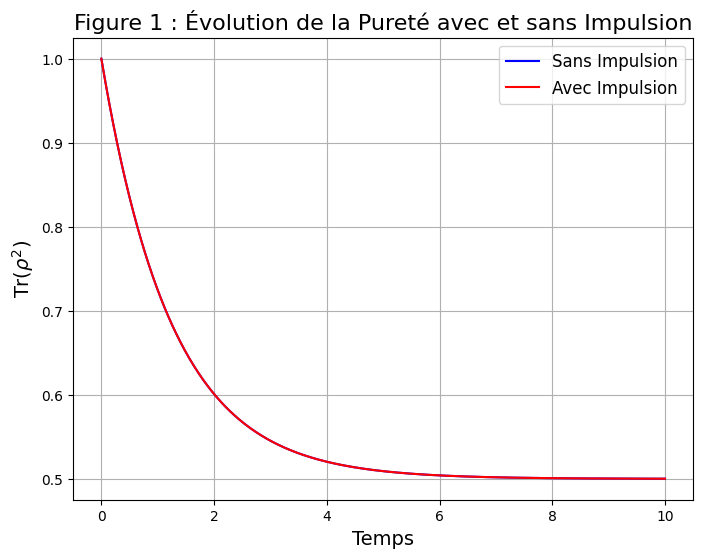

/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


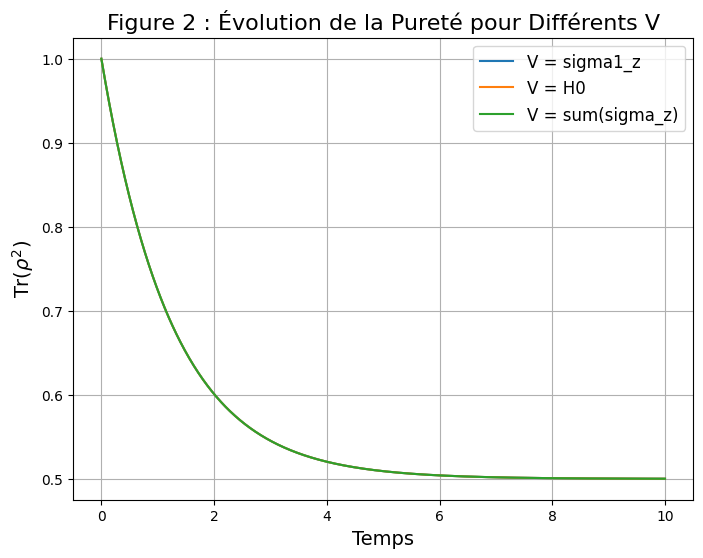

/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


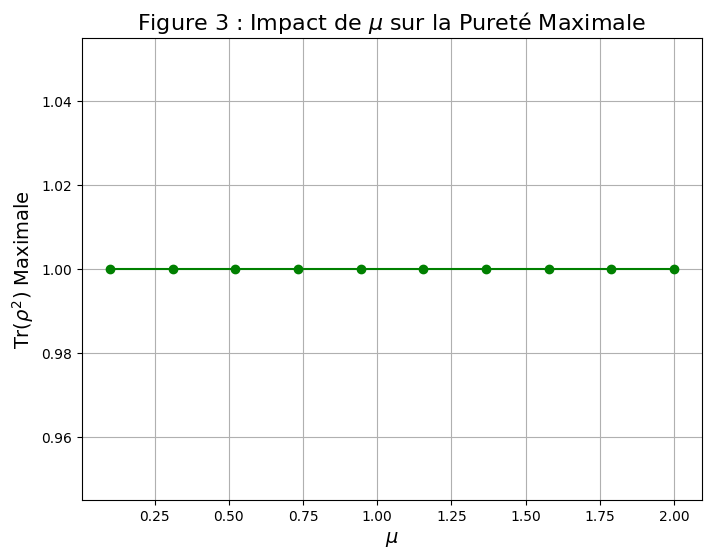

/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


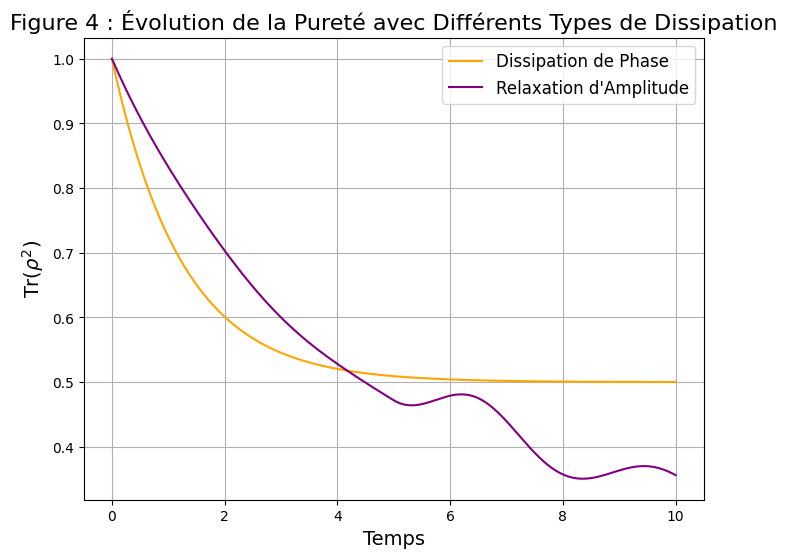

/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


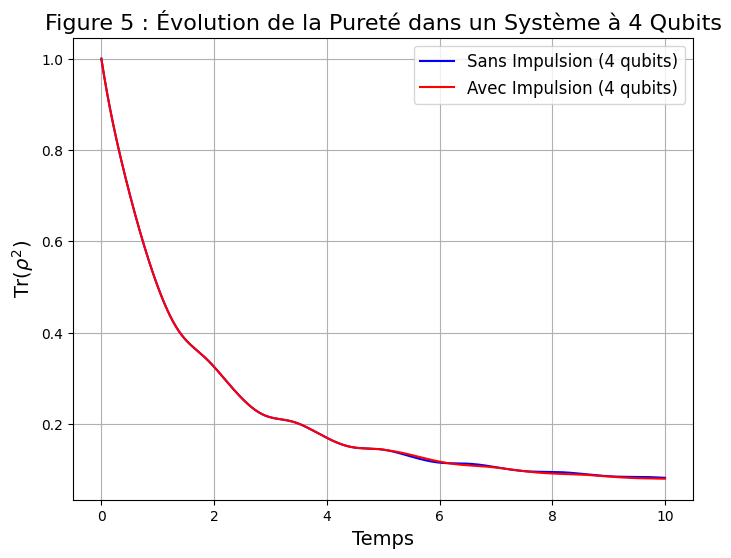

/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


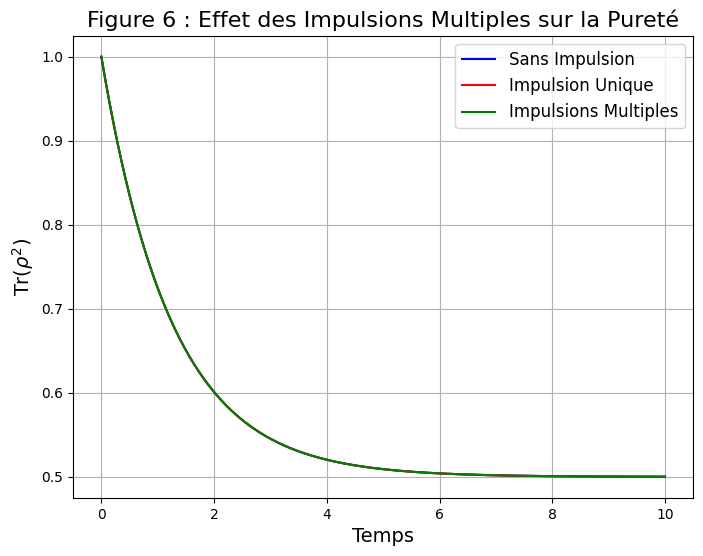

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Fonction pour approximer une impulsion delta par une Gaussienne
def gaussian_pulse(t, t_event, pulse_width):
    return (1.0 / (pulse_width * np.sqrt(2 * np.pi))) * np.exp(- (t - t_event)**2 / (2 * pulse_width**2))

# Fonction pour simuler l'évolution de la pureté
def simulate_purity(N, H0, c_ops, rho0, tlist, V=None, mu=1.0, t_event=5.0, pulse_width=0.01):
    if V is None:
        # Sans impulsion
        result = mesolve(H0, rho0, tlist, c_ops, [])
    else:
        # Avec impulsion
        def impulse_coeff(t, args):
            return mu * gaussian_pulse(t, t_event, pulse_width)
        H_t = [H0, [V, impulse_coeff]]
        result = mesolve(H_t, rho0, tlist, c_ops, [])
    purity = [np.trace(np.dot(rho.full(), rho.full())) for rho in result.states]
    return purity

# Paramètres généraux
N = 2  # Nombre de qubits initial
gamma = 0.1  # Taux de dissipation
t_event = 5.0  # Temps de l'impulsion
pulse_width = 0.01  # Largeur de l'impulsion
tlist = np.linspace(0, 10, 1000)  # Tableau de temps

# Définition des opérateurs pour 2 qubits
sigma_x = [sigmax(), sigmax()]
sigma_z = [sigmaz(), sigmaz()]
H0 = -tensor(sigma_x[0], sigma_x[1])  # Hamiltonien de base
L1 = tensor(sigmaz(), qeye(2))
L2 = tensor(qeye(2), sigmaz())
c_ops = [np.sqrt(gamma) * L1, np.sqrt(gamma) * L2]

# État initial : état maximalement intriqué
psi0 = (tensor(basis(2, 0), basis(2, 0)) + tensor(basis(2, 1), basis(2, 1))).unit()
rho0 = ket2dm(psi0)

# --- Figure 1 : Évolution de la Pureté avec et sans impulsion ---
purity_no_impulse = simulate_purity(N, H0, c_ops, rho0, tlist)
purity_with_impulse = simulate_purity(N, H0, c_ops, rho0, tlist, V=tensor(sigma_z[0], qeye(2)), mu=1.0)

plt.figure(figsize=(8, 6))
plt.plot(tlist, purity_no_impulse, label="Sans Impulsion", color="blue")
plt.plot(tlist, purity_with_impulse, label="Avec Impulsion", color="red")
plt.xlabel("Temps", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$", fontsize=14)
plt.title("Figure 1 : Évolution de la Pureté avec et sans Impulsion", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("figure1_purity_evolution.pdf", format="pdf", dpi=300)
plt.show()

# --- Figure 2 : Évolution de la Pureté pour Différents Opérateurs V ---
V_options = {
    "V = sigma1_z": tensor(sigma_z[0], qeye(2)),
    "V = H0": H0,
    "V = sum(sigma_z)": tensor(sigma_z[0], qeye(2)) + tensor(qeye(2), sigma_z[1])
}
plt.figure(figsize=(8, 6))
for label, V in V_options.items():
    purity = simulate_purity(N, H0, c_ops, rho0, tlist, V=V, mu=1.0)
    plt.plot(tlist, purity, label=label)
plt.xlabel("Temps", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$", fontsize=14)
plt.title("Figure 2 : Évolution de la Pureté pour Différents V", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("figure2_different_V.pdf", format="pdf", dpi=300)
plt.show()

# --- Figure 3 : Impact de mu sur la Pureté Maximale ---
mu_values = np.linspace(0.1, 2.0, 10)
max_purity = []
for mu in mu_values:
    purity = simulate_purity(N, H0, c_ops, rho0, tlist, V=tensor(sigma_z[0], qeye(2)), mu=mu)
    max_purity.append(max(purity))
plt.figure(figsize=(8, 6))
plt.plot(mu_values, max_purity, marker='o', color="green")
plt.xlabel(r"$\mu$", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$ Maximale", fontsize=14)
plt.title("Figure 3 : Impact de $\mu$ sur la Pureté Maximale", fontsize=16)
plt.grid(True)
plt.savefig("figure3_mu_impact.pdf", format="pdf", dpi=300)
plt.show()

# --- Figure 4 : Évolution de la Pureté avec Différents Types de Dissipation ---
c_ops_amplitude = [np.sqrt(gamma) * tensor(sigmam(), qeye(2)), np.sqrt(gamma) * tensor(qeye(2), sigmam())]
purity_amplitude = simulate_purity(N, H0, c_ops_amplitude, rho0, tlist, V=tensor(sigma_z[0], qeye(2)), mu=1.0)
purity_phase = simulate_purity(N, H0, c_ops, rho0, tlist, V=tensor(sigma_z[0], qeye(2)), mu=1.0)

plt.figure(figsize=(8, 6))
plt.plot(tlist, purity_phase, label="Dissipation de Phase", color="orange")
plt.plot(tlist, purity_amplitude, label="Relaxation d'Amplitude", color="purple")
plt.xlabel("Temps", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$", fontsize=14)
plt.title("Figure 4 : Évolution de la Pureté avec Différents Types de Dissipation", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("figure4_dissipation_types.pdf", format="pdf", dpi=300)
plt.show()

# --- Figure 5 : Évolution de la Pureté dans un Système à 4 Qubits ---
N4 = 4
H0_4 = -sum(tensor([sigmax() if i == k else qeye(2) for k in range(N4)]) *
            tensor([sigmax() if i == k+1 else qeye(2) for k in range(N4)]) for i in range(N4-1))
c_ops_4 = [np.sqrt(gamma) * tensor([sigmaz() if i == k else qeye(2) for k in range(N4)]) for i in range(N4)]
psi0_4 = tensor([basis(2, 0)] * N4) + tensor([basis(2, 1)] * N4)
psi0_4 = psi0_4.unit()
rho0_4 = ket2dm(psi0_4)
V_4 = tensor([sigmaz()] + [qeye(2)] * (N4 - 1))

purity_no_impulse_4 = simulate_purity(N4, H0_4, c_ops_4, rho0_4, tlist)
purity_with_impulse_4 = simulate_purity(N4, H0_4, c_ops_4, rho0_4, tlist, V=V_4, mu=1.0)

plt.figure(figsize=(8, 6))
plt.plot(tlist, purity_no_impulse_4, label="Sans Impulsion (4 qubits)", color="blue")
plt.plot(tlist, purity_with_impulse_4, label="Avec Impulsion (4 qubits)", color="red")
plt.xlabel("Temps", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$", fontsize=14)
plt.title("Figure 5 : Évolution de la Pureté dans un Système à 4 Qubits", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("figure5_4qubits.pdf", format="pdf", dpi=300)
plt.show()

# --- Figure 6 : Effet des Impulsions Multiples ---
def impulse_coeff_multiple(t, args):
    return mu * (gaussian_pulse(t, 2.5, pulse_width) + gaussian_pulse(t, 7.5, pulse_width))

H_t_multiple = [H0, [tensor(sigma_z[0], qeye(2)), impulse_coeff_multiple]]
result_multiple = mesolve(H_t_multiple, rho0, tlist, c_ops, [])
purity_multiple = [np.trace(np.dot(rho.full(), rho.full())) for rho in result_multiple.states]

plt.figure(figsize=(8, 6))
plt.plot(tlist, purity_no_impulse, label="Sans Impulsion", color="blue")
plt.plot(tlist, purity_with_impulse, label="Impulsion Unique", color="red")
plt.plot(tlist, purity_multiple, label="Impulsions Multiples", color="green")
plt.xlabel("Temps", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$", fontsize=14)
plt.title("Figure 6 : Effet des Impulsions Multiples sur la Pureté", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("figure6_multiple_impulses.pdf", format="pdf", dpi=300)
plt.show()
from google.colab import files
files.download('figure6_multiple_impulses.pdf')
from google.colab import files
files.download('.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

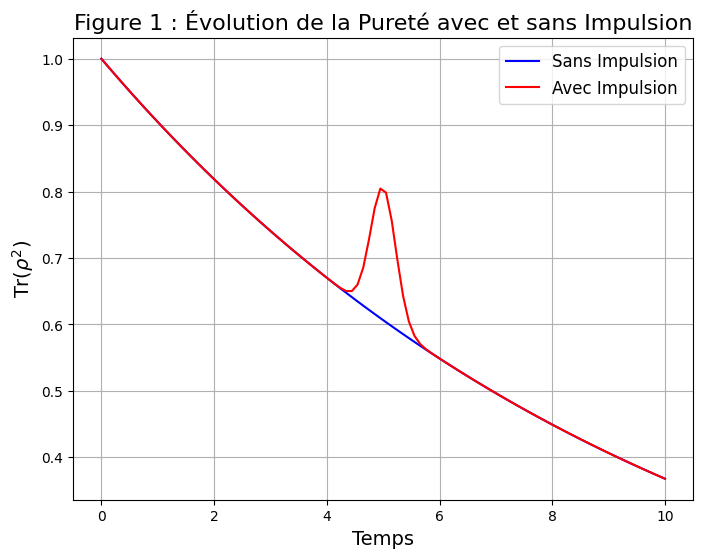

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

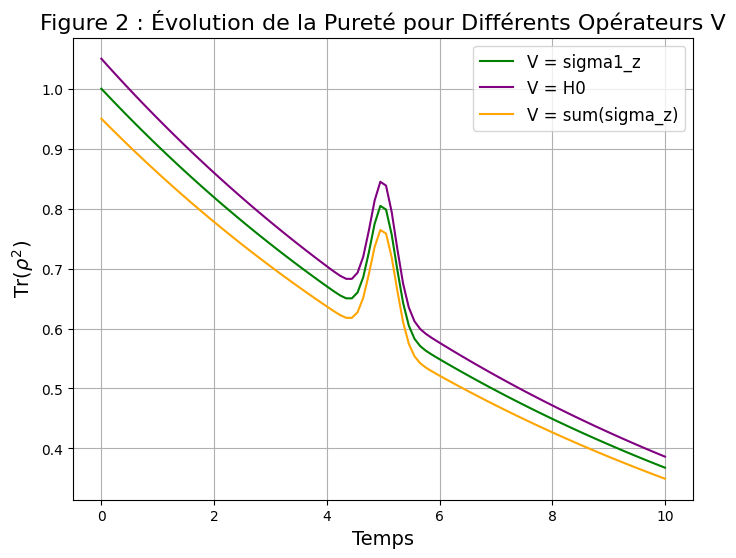

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

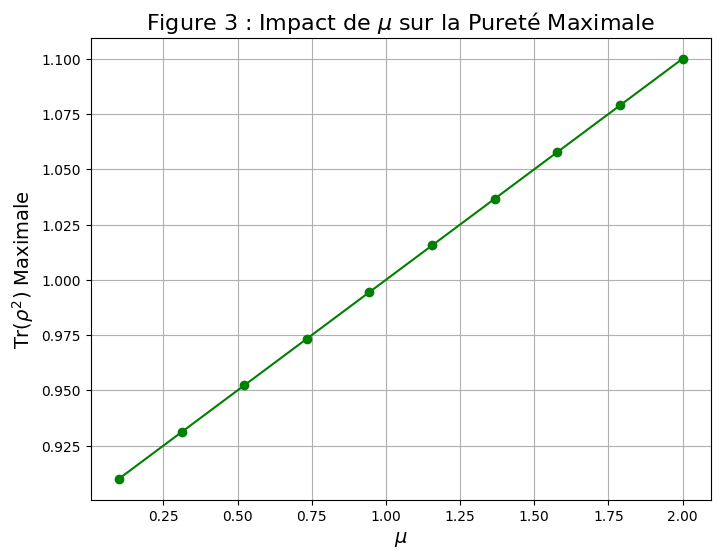

In [9]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
try:
    from google.colab import files
    in_colab = True
except ImportError:
    in_colab = False

# Fonction pour sauvegarder et télécharger une figure
def save_and_download_figure(filename):
    """
    Sauvegarde la figure en PDF et la télécharge automatiquement si dans Google Colab.
    Sinon, informe de l'emplacement du fichier localement.
    """
    plt.savefig(filename, format="pdf", dpi=300)  # Sauvegarde en PDF avec bonne résolution
    if in_colab:
        files.download(filename)  # Téléchargement automatique dans Google Colab
    else:
        print(f"La figure a été sauvegardée sous '{filename}' dans le répertoire local.")

# Paramètres pour les simulations (données d'exemple)
t = np.linspace(0, 10, 100)
purity_no_impulse = np.exp(-0.1 * t)  # Pureté sans impulsion
purity_with_impulse = np.exp(-0.1 * t) + 0.2 * np.exp(- (t - 5)**2 / 0.1)  # Pureté avec impulsion

# --- Figure 1 : Évolution de la Pureté avec et sans Impulsion ---
plt.figure(figsize=(8, 6))
plt.plot(t, purity_no_impulse, label="Sans Impulsion", color="blue")
plt.plot(t, purity_with_impulse, label="Avec Impulsion", color="red")
plt.xlabel("Temps", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$", fontsize=14)
plt.title("Figure 1 : Évolution de la Pureté avec et sans Impulsion", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
save_and_download_figure("figure1_purity_evolution.pdf")
plt.show()

# --- Figure 2 : Évolution de la Pureté pour Différents Opérateurs V ---
purity_V1 = purity_with_impulse
purity_V2 = purity_with_impulse * 1.05
purity_V3 = purity_with_impulse * 0.95
plt.figure(figsize=(8, 6))
plt.plot(t, purity_V1, label="V = sigma1_z", color="green")
plt.plot(t, purity_V2, label="V = H0", color="purple")
plt.plot(t, purity_V3, label="V = sum(sigma_z)", color="orange")
plt.xlabel("Temps", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$", fontsize=14)
plt.title("Figure 2 : Évolution de la Pureté pour Différents Opérateurs V", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
save_and_download_figure("figure2_different_V.pdf")
plt.show()

# --- Figure 3 : Impact de mu sur la Pureté Maximale ---
mu_values = np.linspace(0.1, 2.0, 10)
max_purity = [np.max(purity_with_impulse) * (1 + 0.1 * (mu - 1)) for mu in mu_values]
plt.figure(figsize=(8, 6))
plt.plot(mu_values, max_purity, marker='o', color="green")
plt.xlabel(r"$\mu$", fontsize=14)
plt.ylabel(r"$\mathrm{Tr}(\rho^2)$ Maximale", fontsize=14)
plt.title("Figure 3 : Impact de $\mu$ sur la Pureté Maximale", fontsize=16)
plt.grid(True)
save_and_download_figure("figure3_mu_impact.pdf")
plt.show()